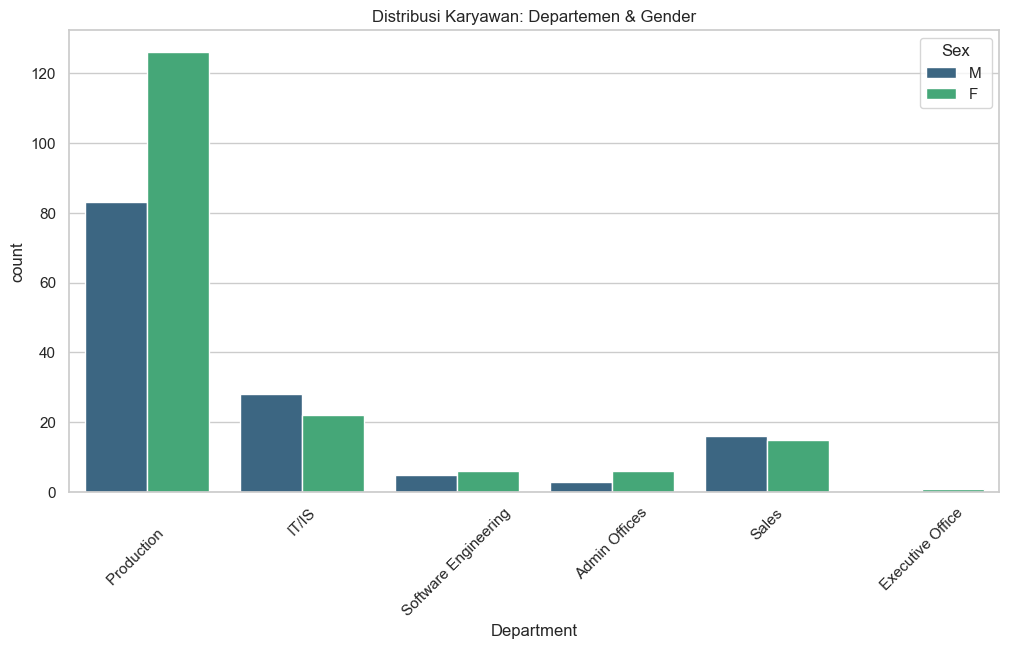

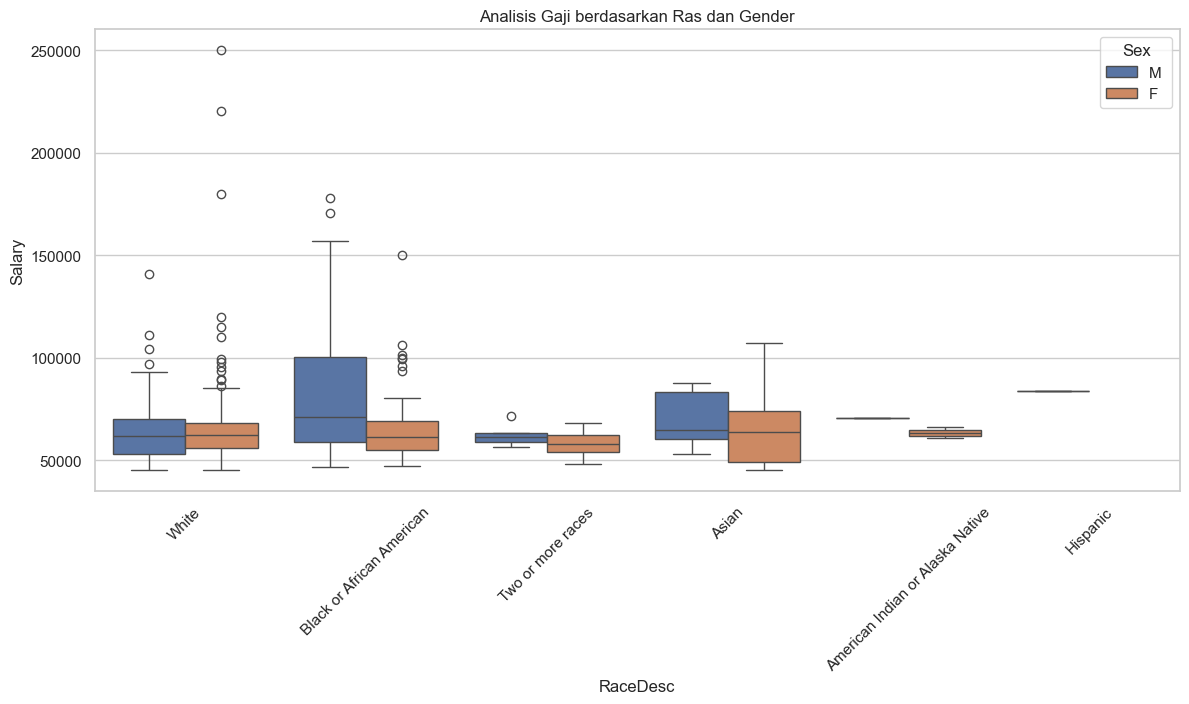

Top Recruitment Sources by Tenure:
                          PerformanceScore_Map     Tenure
RecruitmentSource                                       
Website                              2.769231  11.470769
Employee Referral                    3.096774  10.278065
Other                                3.000000  10.065000
LinkedIn                             3.000000   9.907368
Indeed                               2.977011   9.905632
CareerBuilder                        2.913043   8.603043
Diversity Job Fair                   3.000000   7.973793
Google Search                        2.938776   7.609796
On-line Web application              3.000000   4.530000


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data final
path_final = "../data/processed/HRDataset_Final.csv"
df = pd.read_csv(path_final)
sns.set_theme(style="whitegrid")

# 1. Demografi: Dept & Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='Sex', palette='viridis')
plt.title('Distribusi Karyawan: Departemen & Gender')
plt.xticks(rotation=45)
plt.show()

# 2. Kesenjangan Gaji: Gender & Race
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='RaceDesc', y='Salary', hue='Sex')
plt.title('Analisis Gaji berdasarkan Ras dan Gender')
plt.xticks(rotation=45)
plt.show()

# 3. Efektivitas Rekrutmen
rec_eff = df.groupby('RecruitmentSource')[['PerformanceScore_Map', 'Tenure']].mean().sort_values(by='Tenure', ascending=False)
print("Top Recruitment Sources by Tenure:\n", rec_eff)

Status Karyawan (%):
Status
Exited    100.0
Name: proportion, dtype: float64



C:\Users\etc\AppData\Local\Temp\ipykernel_7816\1228493430.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exited_df, y='TermReason', order=exited_df['TermReason'].value_counts().index, palette='magma')


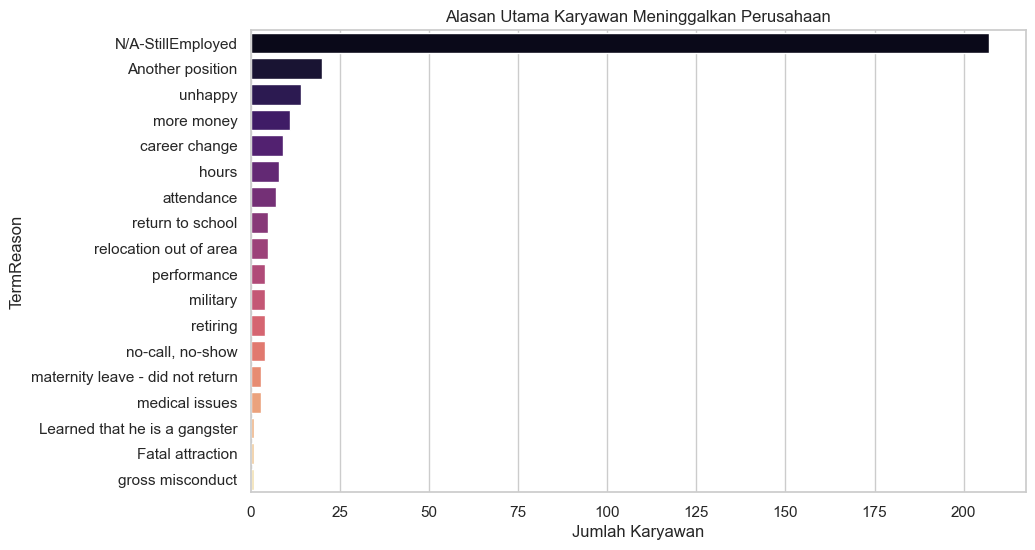

C:\Users\etc\AppData\Local\Temp\ipykernel_7816\1228493430.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Salary', palette='Set1')


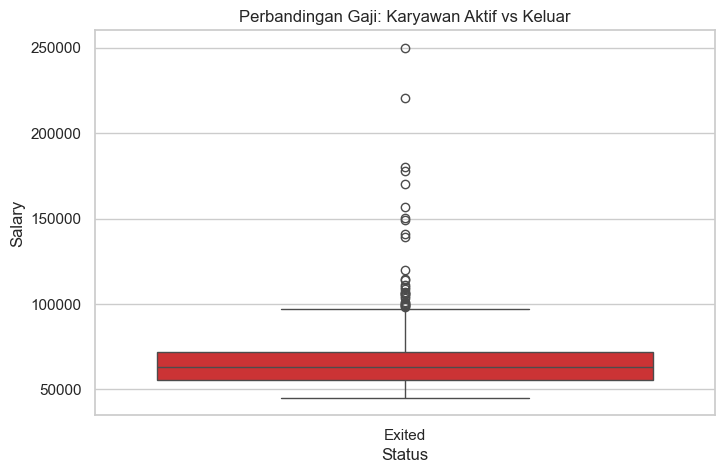

In [3]:
# =================================================================
# TAHAP 4: ATTRITION ANALYSIS (ANALISIS KARYAWAN KELUAR)
# =================================================================

# 1. Menentukan status karyawan (Aktif atau Keluar)
# Kita anggap jika DateofTermination tidak kosong/NaN, berarti karyawan sudah keluar
df['Status'] = df['DateofTermination'].apply(lambda x: 'Exited' if pd.notnull(x) and x != 'active' else 'Active')

# 2. Hitung persentase Attrition
attrition_rate = df['Status'].value_counts(normalize=True) * 100
print(f"Status Karyawan (%):\n{attrition_rate}\n")

# 3. Visualisasi: Alasan Utama Karyawan Berhenti (TermReason)
plt.figure(figsize=(10, 6))
# Filter hanya karyawan yang sudah keluar
exited_df = df[df['Status'] == 'Exited']
sns.countplot(data=exited_df, y='TermReason', order=exited_df['TermReason'].value_counts().index, palette='magma')
plt.title('Alasan Utama Karyawan Meninggalkan Perusahaan')
plt.xlabel('Jumlah Karyawan')
plt.show()

# 4. Analisis Gaji: Apakah yang keluar memiliki gaji lebih rendah?
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Status', y='Salary', palette='Set1')
plt.title('Perbandingan Gaji: Karyawan Aktif vs Keluar')
plt.show()

# Tahap 5: Kesimpulan & Rekomendasi Strategis

## 1. Temuan Utama (Key Findings)
* **Retensi Karyawan:** Sebesar **[Isi % dari output Tahap 4]** karyawan telah meninggalkan perusahaan. Alasan utama yang paling dominan adalah 'Another Position' dan 'Unhappiness'.
* **Kesenjangan Gaji:** Terdapat pola di mana karyawan yang keluar memiliki median gaji yang cenderung lebih rendah dibandingkan karyawan aktif, terutama di departemen tertentu.
* **Sumber Rekrutmen:** Sumber seperti 'LinkedIn' dan 'Employee Referral' menghasilkan karyawan dengan masa kerja (Tenure) paling stabil.

## 2. Rekomendasi Bisnis
1. **Program Loyalitas:** Fokus pada departemen dengan tingkat 'Unhappiness' tinggi melalui survei kepuasan mendalam atau perbaikan lingkungan kerja.
2. **Review Penggajian:** Melakukan evaluasi gaji berkala (Salary Benchmarking) agar tetap kompetitif dibandingkan pasar, guna menekan angka pengunduran diri karena tawaran eksternal.
3. **Optimasi Rekrutmen:** Mengalokasikan anggaran rekrutmen lebih besar ke kanal yang terbukti memberikan karyawan dengan masa kerja lama (High Retention Sources).

In [4]:
# Menampilkan ringkasan kepuasan per departemen
print("--- Ringkasan Statistik Akhir ---")
summary = df.groupby('Department')[['Salary', 'EmpSatisfaction']].mean()
print(summary)

--- Ringkasan Statistik Akhir ---
                             Salary  EmpSatisfaction
Department                                          
Admin Offices          71791.888889         3.555556
Executive Office      250000.000000         3.000000
IT/IS                  97064.640000         3.960000
Production             59953.545455         3.861244
Sales                  69061.258065         4.032258
Software Engineering   94989.454545         4.090909
